In [1]:
%matplotlib inline

In [2]:
import itertools

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import config
from utils.torch.pathological_images_dataset import PathologicalImagesDataset
from utils.torch.transforms import ImageMaskTransformsCompose, RandomHorizontalFlip, RandomVerticalFlip, RandomTranspose

# Dataset

In [6]:
dataset = PathologicalImagesDataset(config.DATASET_TRAIN_DIR)

# Plot some images

In [7]:
i = 0

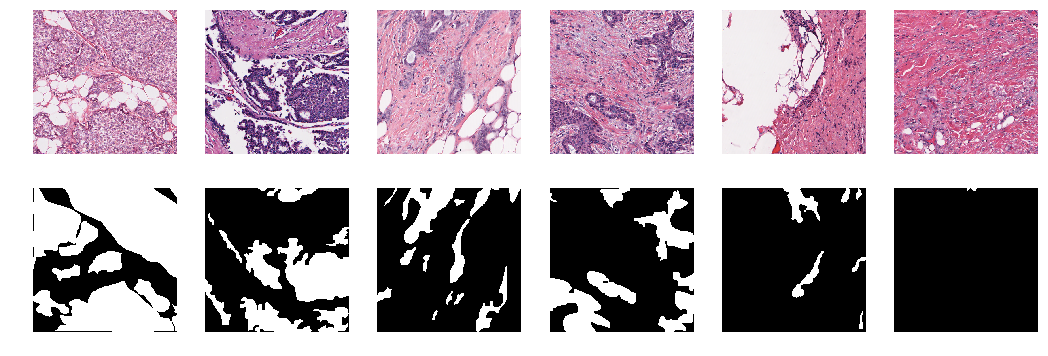

In [8]:
fig, (axes_img, axes_mask) = plt.subplots(2, 6, figsize=(18, 6))
for ax_img, ax_mask in zip(axes_img, axes_mask):
    image, mask = dataset[i]
    
    ax_img.imshow(image)
    ax_img.set_axis_off()

    ax_mask.imshow(mask, cmap='gray')
    ax_mask.set_axis_off()    

    i += 1

# Test augmentation

In [9]:
image, mask = dataset[3]

In [10]:
image.shape, mask.shape

((500, 500, 3), (500, 500))

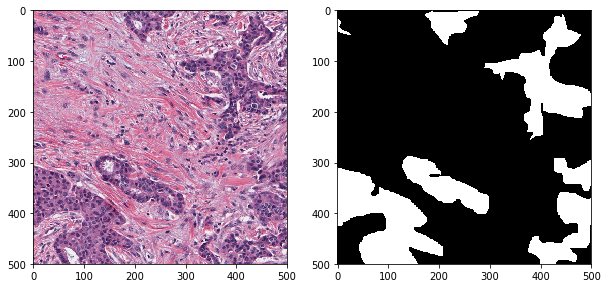

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image, cmap='gray')
ax2.imshow(mask, cmap='gray')

In [12]:
transform = ImageMaskTransformsCompose([
    RandomTranspose(), RandomHorizontalFlip(), RandomVerticalFlip()
])

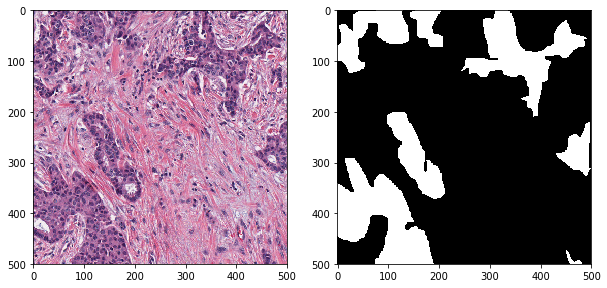

In [28]:
image_t, mask_t = transform(image, mask)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(image_t, cmap='gray')
ax2.imshow(mask_t, cmap='gray')